In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy as sc
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
# 1.Load the dataset :

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221875,142733.0,-0.546587,-0.780787,0.330652,-2.762632,-0.803491,-0.930944,-0.752935,0.445075,-2.145843,0.676511,0.192335,-0.597231,-0.573155,0.156563,-1.643004,-0.103357,0.216691,0.499693,-0.689119,-0.502079,0.084578,0.339543,0.143556,-0.033817,-1.002573,-0.466493,0.106997,0.088778,21.56,0.0
221876,142733.0,-0.597571,1.068927,-0.152701,-0.665124,-0.070571,-0.995440,0.386394,0.480148,-0.002532,-0.098274,0.413469,0.042777,-1.885514,0.931703,-0.928689,0.264155,-0.358804,-0.034014,0.148396,-0.128332,-0.210893,-0.630909,0.146927,0.015893,-0.521202,0.127886,0.212734,0.078965,1.29,0.0
221877,142733.0,-0.344935,1.385742,0.686680,1.035083,0.256868,-0.460239,0.963755,-0.294085,-0.565671,-1.034799,-0.069801,0.318885,1.207708,-1.796288,1.148042,-1.171029,2.175283,0.414696,2.943103,0.385026,-0.211719,-0.288454,-0.367644,-0.007358,0.396272,0.465707,-0.002034,0.097146,40.78,0.0
221878,142734.0,0.775498,-1.572136,-2.926213,3.073629,2.369151,4.231861,0.483197,0.728411,-1.356134,1.285978,-0.331213,-0.345107,-0.027789,0.752094,0.179450,0.913752,-0.988710,-0.220580,-2.058627,1.009984,0.590114,0.226195,-0.428105,0.720941,-0.058027,0.089077,-0.140563,0.046027,605.50,0.0


# 2.Preprocessing.
    a) Print the first 5 rows of the dataset
    b) Check the features in the dataset
    c)Check the missing values
    d)Check the numerical features in the dataset 
    e) Check the distribution of categorical columns

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221880 entries, 0 to 221879
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    221880 non-null  float64
 1   V1      221880 non-null  float64
 2   V2      221880 non-null  float64
 3   V3      221880 non-null  float64
 4   V4      221880 non-null  float64
 5   V5      221880 non-null  float64
 6   V6      221880 non-null  float64
 7   V7      221880 non-null  float64
 8   V8      221880 non-null  float64
 9   V9      221880 non-null  float64
 10  V10     221880 non-null  float64
 11  V11     221880 non-null  float64
 12  V12     221880 non-null  float64
 13  V13     221880 non-null  float64
 14  V14     221880 non-null  float64
 15  V15     221880 non-null  float64
 16  V16     221880 non-null  float64
 17  V17     221880 non-null  float64
 18  V18     221880 non-null  float64
 19  V19     221880 non-null  float64
 20  V20     221880 non-null  float64
 21  V21     22

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
colname = ["V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"]



In [8]:
#data['V11'].fillna(data['V11'].median(),inplace=True)
#data['V12'].fillna(data['V12'].median(),inplace=True)

for colname in data:
  data[colname].fillna(data[colname].mode()[0], inplace = True)

#just filling the missing value with mode in every column

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000,221880.000000
mean,77296.823130,-0.074109,-0.011176,0.208921,0.049926,-0.071338,0.033659,-0.029730,0.005548,0.003582,-0.002836,0.086267,-0.049880,0.020626,0.036017,0.056036,-0.006262,0.016589,-0.024977,-0.008732,0.011994,-0.007653,-0.027229,-0.011341,0.001334,0.042575,0.003379,0.000520,0.002201,90.758359,0.001843
std,38551.561084,1.934175,1.652458,1.483561,1.409439,1.372209,1.320398,1.227869,1.207401,1.125991,1.094493,1.034566,1.062885,1.021849,0.966104,0.936045,0.885605,0.877174,0.842441,0.819900,0.777128,0.743653,0.705782,0.624759,0.605509,0.504728,0.486968,0.399715,0.333098,250.911878,0.042895
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-28.009635,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,46954.750000,-0.951293,-0.597021,-0.523647,-0.820037,-0.754982,-0.727724,-0.569129,-0.193147,-0.662272,-0.521731,-0.672134,-0.457519,-0.649012,-0.382240,-0.537128,-0.479012,-0.455131,-0.515813,-0.480676,-0.201214,-0.225793,-0.533722,-0.167703,-0.347893,-0.266359,-0.331146,-0.069203,-0.046772,6.000000,0.000000
50%,72033.500000,-0.045141,0.070330,0.396626,0.048560,-0.130884,-0.233958,0.006476,0.034901,-0.069095,-0.093914,0.038123,0.117038,0.001580,0.069167,0.131576,0.059412,-0.044062,-0.028094,-0.007497,-0.049531,-0.036415,-0.015742,-0.024323,0.048482,0.081492,-0.060304,0.004004,0.016465,23.390000,0.000000
75%,118063.250000,1.236558,0.780964,1.167186,0.846822,0.520541,0.435703,0.527879,0.332762,0.615891,0.454406,0.849398,0.611310,0.690538,0.509103,0.734689,0.528445,0.411758,0.473484,0.468569,0.146317,0.165604,0.463017,0.124381,0.425904,0.376222,0.254160,0.089146,0.078156,79.950000,0.000000
max,142734.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [11]:
for i in data.columns:
    print(""+str(i)+" - ",data[''+str(i)+''].unique())

Time -  [0.00000e+00 1.00000e+00 2.00000e+00 ... 1.42732e+05 1.42733e+05
 1.42734e+05]
V1 -  [-1.35980713  1.19185711 -1.35835406 ... -0.34493496  0.77549774
  2.09217713]
V2 -  [-0.07278117  0.26615071 -1.34016307 ...  1.38574155 -1.57213563
 -0.83199927]
V3 -  [ 2.53634674  0.16648011  1.77320934 ...  0.68668008 -2.92621316
 -2.2685867 ]
V4 -  [ 1.37815522  0.44815408  0.37977959 ...  1.03508269  3.07362917
 -1.04587622]
V5 -  [-0.33832077  0.06001765 -0.50319813 ...  0.25686792  2.36915084
  0.06535919]
V6 -  [ 0.46238778 -0.08236081  1.80049938 ... -0.46023924  4.23186077
 -1.03219562]
V7 -  [ 0.23959855 -0.07880298  0.79146096 ...  0.96375455  0.48319712
  0.13159278]
V8 -  [ 0.0986979   0.08510165  0.24767579 ... -0.29408488  0.72841101
 -0.32972144]
V9 -  [ 0.36378697 -0.25542513 -1.51465432 ... -0.5656713  -1.3561338
 -1.09235446]
V10 -  [ 0.09079417 -0.16697441  0.20764287 ... -1.03479866  1.28597758
  1.08545235]
V11 -  [-0.55159953  1.61272666  0.62450146 ... -0.06980105 -0.

In [12]:
data.Class.value_counts()

0.0    221471
1.0       409
Name: Class, dtype: int64

here  

    0-currect ;
    1- fraud

In [13]:
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



In [14]:
# Features selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=44)

In [15]:
print("data_columns: ",len(data.columns))
print("len_data:",len(data))

print('X: ', len(X))
print("X.shape :", X.shape)

print('y: ', len(y))
print("y.shape :", y.shape)
                
print('')

print('X_TRAIN : ',X_train.shape)
print('y_TRAIN : ',y_train.shape)
print('X_test : ',X_test.shape)
print('y_test : ',y_test.shape)

data_columns:  31
len_data: 221880
X:  221880
X.shape : (221880, 30)
y:  221880
y.shape : (221880,)

X_TRAIN :  (177504, 30)
y_TRAIN :  (177504,)
X_test :  (44376, 30)
y_test :  (44376,)


In [16]:
# 5.Do normalisation if required

In [17]:
from sklearn import preprocessing
train_X = preprocessing.normalize(X_train)
test_X = preprocessing.normalize(X_test)

In [18]:
test_X.shape
#train_X.shape

(44376, 30)

In [19]:
train_X[0:5]

array([[ 9.99999975e-01, -1.11805552e-05,  1.58276586e-05,
         2.37045561e-06, -2.28471608e-05,  1.40482844e-06,
        -1.71885777e-06, -3.92211701e-07, -6.50061665e-06,
         1.67192712e-06, -1.81657969e-05,  4.73772115e-06,
         1.77297820e-05,  1.28645148e-05,  1.07388955e-05,
         1.53255027e-05, -5.29937677e-06, -6.98198810e-06,
         1.83796027e-05,  3.08363610e-05, -2.75490032e-06,
         1.54788482e-05,  7.14529401e-06, -3.87910229e-06,
        -1.23846017e-05,  6.07149018e-07, -8.33225395e-06,
         2.06359157e-06,  1.06938426e-06,  2.12038722e-04],
       [ 9.99999977e-01,  1.61696560e-05,  5.87603513e-07,
        -1.32191559e-05,  1.15525830e-05,  1.90003472e-06,
        -1.02604117e-05,  4.66657941e-06, -2.93182243e-06,
         3.50917856e-06,  2.45355062e-06, -1.03217460e-05,
        -4.14547730e-06, -1.45538801e-05,  6.78473148e-06,
        -3.19130339e-06, -4.91673953e-06, -7.35085603e-07,
        -3.08190459e-06, -1.21417305e-06, -2.89968702e-

In [20]:
# 6.Model Building (ANN)

In [21]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

--> 1. model = relu with sigmoid

In [22]:
model = Sequential()
# 128(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p)
model.add(Dense(128, input_shape = (30, ), activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))



In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
____________________________________________________

In [25]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])
result_1 = model.fit(train_X,y_train, epochs = 5, batch_size = 100, validation_data = (test_X, y_test))


Epoch 1/5
1776/1776 [==============================] - 11s 4ms/step - loss: 0.0438 - accuracy: 0.9952 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 2/5
1776/1776 [==============================] - 14s 8ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.0111 - val_accuracy: 0.9985
Epoch 3/5
1776/1776 [==============================] - 10s 6ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.0113 - val_accuracy: 0.9985
Epoch 4/5
1776/1776 [==============================] - 8s 4ms/step - loss: 0.0141 - accuracy: 0.9981 - val_loss: 0.0128 - val_accuracy: 0.9985
Epoch 5/5
1776/1776 [==============================] - 8s 4ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.0112 - val_accuracy: 0.9985


In [26]:
result_1.history

{'accuracy': [0.9952451586723328,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266],
 'loss': [0.04378245398402214,
  0.014163883402943611,
  0.01420876570045948,
  0.014116878621280193,
  0.01418723538517952],
 'val_accuracy': [0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197],
 'val_loss': [0.011190477758646011,
  0.011145925149321556,
  0.01127535104751587,
  0.012758607044816017,
  0.011179681867361069]}

In [27]:
res_1 = pd.DataFrame(result_1.history)
res_1

,loss,accuracy,val_loss,val_accuracy
0,0.043782,0.995245,0.011190,0.998513
1,0.014164,0.998068,0.011146,0.998513
2,0.014209,0.998068,0.011275,0.998513
3,0.014117,0.998068,0.012759,0.998513
4,0.014187,0.998068,0.011180,0.998513


In [28]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Relu with Sigmoid(o/p)')

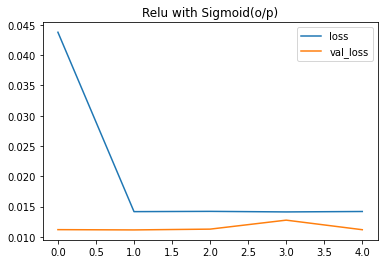

In [29]:
plt.plot(result_1.history['loss'],label='loss')
plt.plot(result_1.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Relu with Sigmoid(o/p)')

Text(0.5, 1.0, 'Relu with Sigmoid(o/p)')

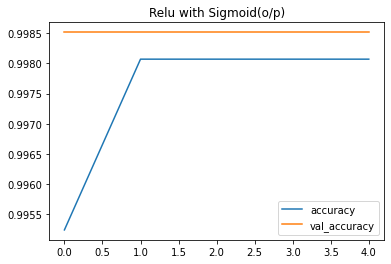

In [30]:
plt.plot(result_1.history['accuracy'],label='accuracy')
plt.plot(result_1.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Relu with Sigmoid(o/p)')

Text(0, 0.5, 'Predictions')

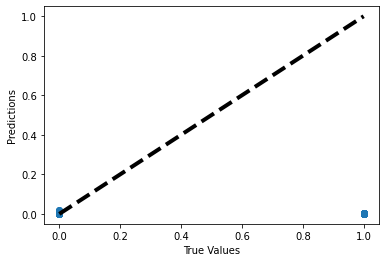

In [31]:
import matplotlib.pyplot as plt 

y_pred = model.predict(test_X)
fig,ax = plt.subplots()
plt.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [32]:
from xgboost import XGBClassifier
boost = XGBClassifier()
boost.fit(train_X, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Text(0, 0.5, 'Predictions')

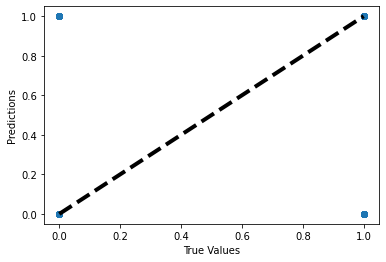

In [33]:
y_pred = boost.predict(train_X)
fig,ax = plt.subplots()
plt.scatter(y_train, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Observations :
  Relu (Rectified Linear Units) - Range(0, x)

  Here , i've taken in relu -- 30 cols as input layer , 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(output layer).
  These are like i/p layer then inner/dense layer and o/p layer. 

  in this relu with sigmoid , 
  
  we can take :  

      loss = "binary_crossentropy", "Categorical_crossentropy"
      optimizer = "adam", "sgd", 
      metrics = ['accuracy'],['mse'],['mae'] , or any
      epochs = 35, (any num as per size
      batch_size = 100.

  here there are another different losses, optimizer and metrics  are also present . ephocs is nothing but the size, and when it comes to batch size here is my observation that when we increase the batch size the test data size is decreasing & when u decrease the batchsize it will increase to original size.We taken validation_data(test_data) and train data we get train_data (loss & accuracy) and test_data(loss & accuracy). we can check over-fitting/under-fitting. 
  by using Sigmoid in output-layer the result in acc is 99% which is quite good and loss is also less. 
  
    lets check it relu with softmax

--> 2. model_2 = relu with "softmax".

In [34]:
model_2 = Sequential()
# 30(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer- 1(o/p) layer
model_2.add(Dense(64, input_shape = (30, ), activation = "relu"))
model_2.add(layers.Dropout(0.2))

model_2.add(Dense(32, activation = "relu"))
model_2.add(layers.Dropout(0.2))
model_2.add(Dense(16, activation = "relu"))
model_2.add(layers.Dropout(0.2))
model_2.add(Dense(8, activation = "relu"))
model_2.add(layers.Dropout(0.2))
model_2.add(Dense(1, activation = "softmax"))



In [35]:
print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                1984      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                

In [36]:
model_2.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ['accuracy'])
result_2 = model_2.fit(train_X,y_train, epochs = 15, batch_size = 80, validation_data = (test_X, y_test))

Epoch 1/15
2219/2219 [==============================] - 11s 4ms/step - loss: 0.0358 - accuracy: 0.0019 - val_loss: 0.0125 - val_accuracy: 0.0015
Epoch 2/15
2219/2219 [==============================] - 10s 4ms/step - loss: 0.0182 - accuracy: 0.0019 - val_loss: 0.0112 - val_accuracy: 0.0015
Epoch 3/15
2219/2219 [==============================] - 10s 4ms/step - loss: 0.0170 - accuracy: 0.0019 - val_loss: 0.0112 - val_accuracy: 0.0015
Epoch 4/15
2219/2219 [==============================] - 9s 4ms/step - loss: 0.0165 - accuracy: 0.0019 - val_loss: 0.0112 - val_accuracy: 0.0015
Epoch 5/15
2219/2219 [==============================] - 10s 4ms/step - loss: 0.0159 - accuracy: 0.0019 - val_loss: 0.0111 - val_accuracy: 0.0015
Epoch 6/15
2219/2219 [==============================] - 10s 4ms/step - loss: 0.0153 - accuracy: 0.0019 - val_loss: 0.0112 - val_accuracy: 0.0015
Epoch 7/15
2219/2219 [==============================] - 10s 4ms/step - loss: 0.0151 - accuracy: 0.0019 - val_loss: 0.0112 - val_acc

In [37]:
pred_y = model_2.predict(np.reshape(test_X[0], (-1, 30)))

print(pred_y)

[[1.]]


In [38]:
print(y[0])

0.0


Text(0, 0.5, 'Predictions')

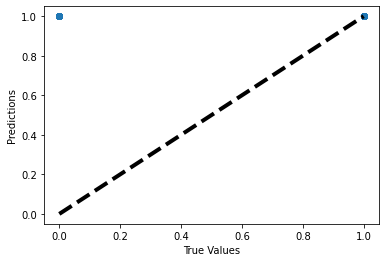

In [39]:
import matplotlib.pyplot as plt 

y_pred = model_2.predict(test_X)
fig,ax = plt.subplots()
plt.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [40]:
result_2.history

{'accuracy': [0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053],
 'loss': [0.03575810045003891,
  0.018199069425463676,
  0.016967592760920525,
  0.016452904790639877,
  0.015901340171694756,
  0.015285680070519447,
  0.01505606435239315,
  0.01484085712581873,
  0.014876456931233406,
  0.014668101444840431,
  0.01453643199056387,
  0.014629252254962921,
  0.014575433917343616,
  0.014391826465725899,
  0.014277400448918343],
 'val_accuracy': [0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.00

Text(0.5, 1.0, 'Relu with Softmax(o/p)')

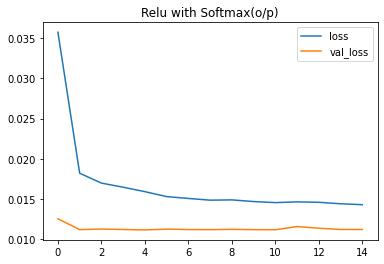

In [41]:
plt.plot(result_2.history['loss'],label='loss')
plt.plot(result_2.history['val_loss'],label='val_loss')
plt.legend()
plt.title('Relu with Softmax(o/p)')

Text(0.5, 1.0, 'Relu with Softmax(o/p)')

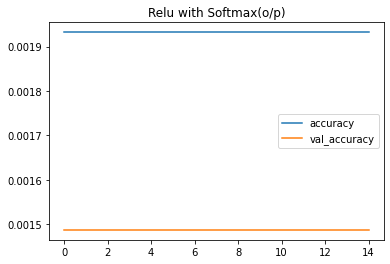

In [42]:
plt.plot(result_2.history['accuracy'],label='accuracy')
plt.plot(result_2.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Relu with Softmax(o/p)')

# Observation :
  Here i've taken Relu with Softmax in last(o/p) layer.

  30(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner layer) - 8(inner layer) - 1(o/p) layer. These are like i/p layer then inner/dense layer and o/p layer.

i've taken :

    loss = ["binary_crossentropy"],
    optimizer = "adam",
    metrics = ['accuracy']
    epochs = 5, (any num as per size
    batch_size = 80.

As u can see in reuslt relu with Softmax in last layer we got the accuracy is much much less (loss: 0.0155 - accuracy: 0.0019 - val_loss: 0.0112 - val_accuracy: 0.001) this is the difference from model 1 & 2.

where the acc is less when Softmax is used in o/p layer, when compared to sigmoid in o/p layer. 

  Lets Check new model Leaky_Relu with Sigmoid....

--> 3. model_3 - Leaky_relu

In [43]:
model_3 = Sequential()
# 30(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 1(o/p) layer

model_3.add(Dense(64, input_shape = (30,), activation = tf.keras.layers.LeakyReLU(alpha = 0.1)))
model_3.add(Dense(32, activation = tf.keras.layers.LeakyReLU(alpha = 0.3)))
model_3.add(Dense(16, activation = tf.keras.layers.LeakyReLU(alpha = 0.1)))
model_3.add(Dense(1, activation = "sigmoid"))


In [44]:
print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                1984      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
model_3.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

result_3 = model_3.fit(train_X,y_train, epochs = 10, batch_size = 68, validation_data = (test_X, y_test))

Epoch 1/10
2611/2611 [==============================] - 12s 4ms/step - loss: 0.0391 - accuracy: 0.9973 - val_loss: 0.0113 - val_accuracy: 0.9985
Epoch 2/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.9981 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 3/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.9981 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 4/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.9981 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 5/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.9981 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 6/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.9981 - val_loss: 0.0112 - val_accuracy: 0.9985
Epoch 7/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.9981 - val_loss: 0.0112 - val_ac

In [46]:
result_3.history

{'accuracy': [0.9973127245903015,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266],
 'loss': [0.03908181190490723,
  0.014012809842824936,
  0.014011208899319172,
  0.01401206012815237,
  0.014010238461196423,
  0.014011935330927372,
  0.014012419618666172,
  0.014007903635501862,
  0.014012408442795277,
  0.014012628234922886],
 'val_accuracy': [0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197],
 'val_loss': [0.011284438893198967,
  0.011216252110898495,
  0.01121752429753542,
  0.011230620555579662,
  0.01122660655528307,
  0.011219490319490433,
  0.011234804056584835,
  0.011198382824659348,
  0.0111989825963974,
  0.011218798346817493]}

Text(0.5, 1.0, 'Leaky_relu with Sigmoid(o/p)')

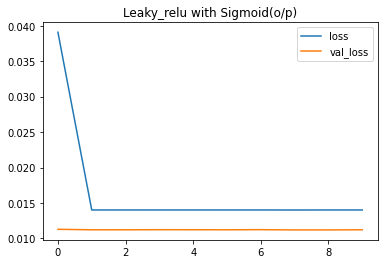

In [47]:
plt.plot(result_3.history['loss'],label = 'loss')
plt.plot(result_3.history['val_loss'], label= 'val_loss')
plt.legend()
plt.title('Leaky_relu with Sigmoid(o/p)')

Text(0.5, 1.0, 'Leaky_relu with Sigmoid(o/p)')

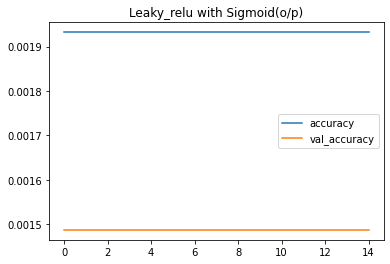

In [48]:
plt.plot(result_2.history['accuracy'],label='accuracy')
plt.plot(result_2.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.title('Leaky_relu with Sigmoid(o/p)')

Text(0, 0.5, 'Predictions')

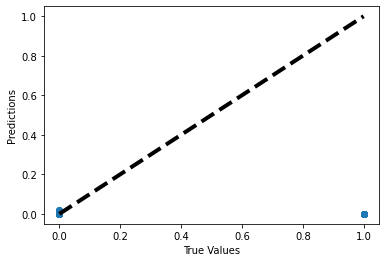

In [49]:
y_pred = model_3.predict(test_X)

fig,ax = plt.subplots()
plt.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Observations:
  Here taken Leaky_relu with Sigmoid.

  30(col)(i/p layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 1(o/p) layer. These are like i/p & inner/dense layer & o/p layer.
  
Leaky relu = in relu these is a drawback (As it triggers 0 , if it triggers always 0 then the neuron dies , if neuron dies entire system gets damage) to overcome that drawback we use leakyrelu. range(x,alpha(x)) where alpha == constant.

i've taken 

    loss = ["binary_crossentropy"],
    optimizer = "sgd",
    metrics = ['accuracy']
    epochs = 10, (any num as per size
    batch_size = 68.

As u can see in result , the accuracy is quite good and loss is less.

 --> 4. model_4 = Model_sigmoid

In [50]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [51]:
from tensorflow.keras.models import Sequential

model_sigmoid = Sequential()

# 30(col)(i/p layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer) - 1(o/p) layer.
model_sigmoid.add(Dense(128, input_shape = (30,), activation = "sigmoid"))
model_sigmoid.add(Dense(64, activation = "sigmoid"))
model_sigmoid.add(Dense(32, activation = "sigmoid"))
model_sigmoid.add(Dense(16, activation = "sigmoid"))
model_sigmoid.add(Dense(8, activation = "sigmoid"))
model_sigmoid.add(Dense(1, activation = "softmax"))


In [52]:
model_sigmoid.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 9         
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
__________________________________________________

In [53]:
model_sigmoid.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

result_4 = model_sigmoid.fit(train_X,y_train, epochs = 10, batch_size = 68, validation_data = (test_X, y_test))

Epoch 1/10
2611/2611 [==============================] - 11s 4ms/step - loss: 0.0455 - accuracy: 0.0019 - val_loss: 0.0151 - val_accuracy: 0.0015
Epoch 2/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0157 - accuracy: 0.0019 - val_loss: 0.0124 - val_accuracy: 0.0015
Epoch 3/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0145 - accuracy: 0.0019 - val_loss: 0.0118 - val_accuracy: 0.0015
Epoch 4/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0142 - accuracy: 0.0019 - val_loss: 0.0115 - val_accuracy: 0.0015
Epoch 5/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0141 - accuracy: 0.0019 - val_loss: 0.0114 - val_accuracy: 0.0015
Epoch 6/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.0019 - val_loss: 0.0113 - val_accuracy: 0.0015
Epoch 7/10
2611/2611 [==============================] - 10s 4ms/step - loss: 0.0140 - accuracy: 0.0019 - val_loss: 0.0113 - val_ac

In [54]:
result_4.history

{'accuracy': [0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053],
 'loss': [0.04545610398054123,
  0.015690449625253677,
  0.014519239775836468,
  0.014203265309333801,
  0.014090116135776043,
  0.014044509269297123,
  0.014024323783814907,
  0.014015261083841324,
  0.014011510647833347,
  0.014008941128849983],
 'val_accuracy': [0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604],
 'val_loss': [0.015093591064214706,
  0.012411427684128284,
  0.011752997525036335,
  0.011497355997562408,
  0.011381551623344421,
  0.011320450343191624,
  0.01128576323390007,
  0.011268502101302147,
  0.011254039593040

Text(0.5, 1.0, 'Sigmoid_with_Softmax(o/p)')

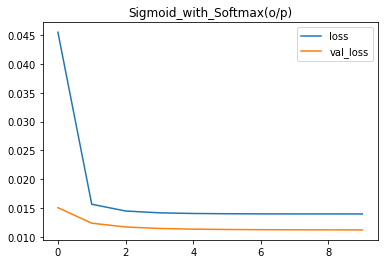

In [55]:
plt.plot(result_4.history['loss'], label = 'loss')
plt.plot(result_4.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title('Sigmoid_with_Softmax(o/p)')

Text(0.5, 1.0, 'Sigmoid_with_softmax(o/p)')

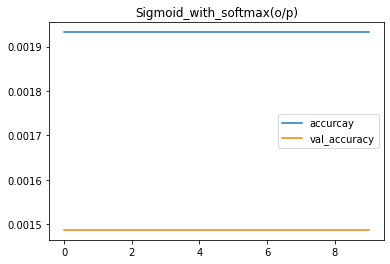

In [56]:
plt.plot(result_4.history['accuracy'], label = 'accurcay')
plt.plot(result_4.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Sigmoid_with_softmax(o/p)')

Text(0, 0.5, 'Predictions')

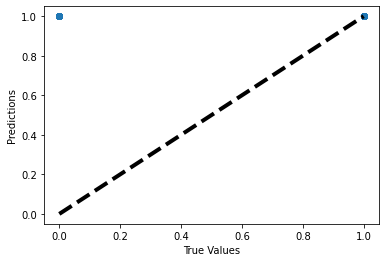

In [57]:
import matplotlib.pyplot as plt 

y_pred = model_sigmoid.predict(test_X)
fig,ax = plt.subplots()
plt.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [58]:
y_pred.__len__()

44376

# Observation
  Sigmoid = this is also known as logistic function, its basically non-linear activation function.

  30(col)(i/p layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer) - 1(o/p) layer.

  taken = 

    loss = ["binary_crossentropy"],
    optimizer = "sgd",
    metrics = ['accuracy']
    epochs = 10, (any num as per size
    batch_size = 68.

Here is the result we used Sigmoid with Softmax , so result here are observing is that the loss is less and the accuracy is also less. in 2nd model where softmax is used in output layer tehre is also the accuracy is very less.

  Lets check the other model "ELU"....

In [59]:
# sigmoid 
from tensorflow.keras.models import Sequential

model_sigmoid2 = Sequential()
# 30(col)(i/p layer) - 256(innerlayer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer) - 1(o/p) layer.
model_sigmoid2.add(Dense(256, input_shape = (30,), activation = 'sigmoid'))
model_sigmoid2.add(Dense(128, activation = "sigmoid"))
model_sigmoid2.add(Dense(64, activation = "sigmoid"))
model_sigmoid2.add(Dense(32, activation = "sigmoid"))
model_sigmoid2.add(Dense(16, activation = "sigmoid"))
model_sigmoid2.add(Dense(8, activation = "sigmoid"))
model_sigmoid2.add(Dense(1, activation = "sigmoid"))


In [60]:
model_sigmoid2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               7936      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [61]:
model_sigmoid2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

result_5 = model_sigmoid2.fit(train_X,y_train, epochs = 8, batch_size = 88, validation_data = (test_X, y_test))


Epoch 1/8
2018/2018 [==============================] - 9s 4ms/step - loss: 0.0716 - accuracy: 0.9941 - val_loss: 0.0194 - val_accuracy: 0.9985
Epoch 2/8
2018/2018 [==============================] - 8s 4ms/step - loss: 0.0181 - accuracy: 0.9981 - val_loss: 0.0141 - val_accuracy: 0.9985
Epoch 3/8
2018/2018 [==============================] - 8s 4ms/step - loss: 0.0156 - accuracy: 0.9981 - val_loss: 0.0126 - val_accuracy: 0.9985
Epoch 4/8
2018/2018 [==============================] - 8s 4ms/step - loss: 0.0148 - accuracy: 0.9981 - val_loss: 0.0121 - val_accuracy: 0.9985
Epoch 5/8
2018/2018 [==============================] - 8s 4ms/step - loss: 0.0144 - accuracy: 0.9981 - val_loss: 0.0118 - val_accuracy: 0.9985
Epoch 6/8
2018/2018 [==============================] - 8s 4ms/step - loss: 0.0142 - accuracy: 0.9981 - val_loss: 0.0116 - val_accuracy: 0.9985
Epoch 7/8
2018/2018 [==============================] - 8s 4ms/step - loss: 0.0141 - accuracy: 0.9981 - val_loss: 0.0115 - val_accuracy: 0.9985

In [62]:
result_5.history

{'accuracy': [0.9941240549087524,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266],
 'loss': [0.07157358527183533,
  0.01811946928501129,
  0.01555693056434393,
  0.014752517454326153,
  0.014408271759748459,
  0.014236561954021454,
  0.014143336564302444,
  0.014090153388679028],
 'val_accuracy': [0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197,
  0.9985126852989197],
 'val_loss': [0.01935773529112339,
  0.014068874530494213,
  0.012645034119486809,
  0.012051592580974102,
  0.011750724166631699,
  0.011576831340789795,
  0.011470815166831017,
  0.011402084492146969]}

Text(0.5, 1.0, 'model_Sigmoid')

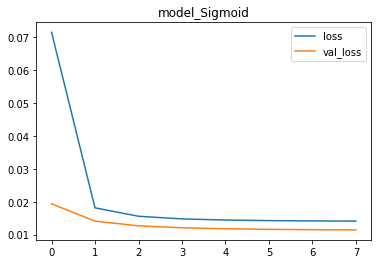

In [63]:
plt.plot(result_5.history['loss'], label = 'loss')
plt.plot(result_5.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title('model_Sigmoid')

Text(0.5, 1.0, 'model_Sigmoid')

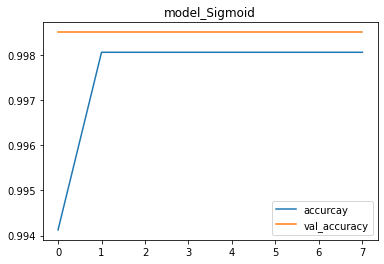

In [64]:
plt.plot(result_5.history['accuracy'], label= 'accurcay')
plt.plot(result_5.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('model_Sigmoid')

# Observations :
    Here used only Sigmoid in above used sigmoid with softmax so the acc and loss is less. 
    when only sigmoid is used the result is different both the result in loss is less & accuracy is high.

--> 5. model_5 = elu(exponential linear units)

In [65]:
from tensorflow.keras.models import Sequential

model_elu = Sequential()
# 30(col)(i/p layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer) - 1(o/p) layer.
model_elu.add(Dense(128, input_shape = (30,), activation = "elu"))
model_elu.add(Dense(64, activation = "elu"))
model_elu.add(Dense(32, activation = "elu"))
model_elu.add(Dense(16, activation = "elu"))
model_elu.add(Dense(8, activation = "elu"))
model_elu.add(Dense(1, activation = "elu"))

In [66]:
model_elu.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               3968      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
__________________________________________________

In [67]:
model_elu.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

result_6 = model_elu.fit(train_X,y_train, epochs = 20, batch_size = 48, validation_data = (test_X, y_test))

Epoch 1/20
3698/3698 [==============================] - 13s 3ms/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9985
Epoch 2/20
3698/3698 [==============================] - 12s 3ms/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9985
Epoch 3/20
3698/3698 [==============================] - 12s 3ms/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9985
Epoch 4/20
3698/3698 [==============================] - 12s 3ms/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9985
Epoch 5/20
3698/3698 [==============================] - 13s 3ms/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9985
Epoch 6/20
3698/3698 [==============================] - 13s 3ms/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0229 - val_accuracy: 0.9985
Epoch 7/20
3698/3698 [==============================] - 11s 3ms/step - loss: 0.0298 - accuracy: 0.9981 - val_loss: 0.0229 - val_ac

In [68]:
result_6.history

{'accuracy': [0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266,
  0.9980676770210266],
 'loss': [0.029806414619088173,
  0.02980642020702362,
  0.029806416481733322,
  0.02980642020702362,
  0.029806409031152725,
  0.029806409031152725,
  0.029806416481733322,
  0.02980642206966877,
  0.029806410893797874,
  0.029806416481733322,
  0.029806414619088173,
  0.029806414619088173,
  0.029806410893797874,
  0.02980642020702362,
  0.029806407168507576,
  0.029806409031152725,
  0.029806407168507576,
  0.029806409031152725,
  0.029806414619088173,
  0.029806416481733322],
 'val_accuracy': [0.9985126852989197,
  0.9985126852989197,
  

Text(0.5, 1.0, 'model_elu')

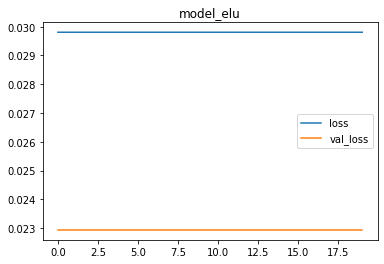

In [69]:
plt.plot(result_6.history['loss'], label = 'loss')
plt.plot(result_6.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title('model_elu')

Text(0.5, 1.0, 'model_elu')

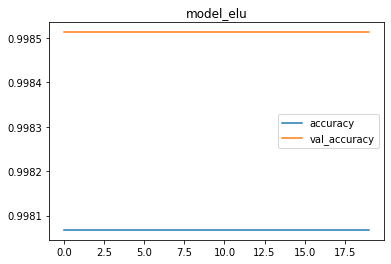

In [70]:
plt.plot(result_6.history['accuracy'], label = 'accuracy')
plt.plot(result_6.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('model_elu')

Text(0, 0.5, 'Predictions')

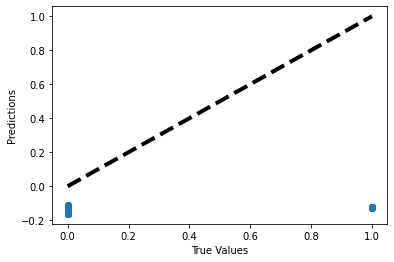

In [71]:
import matplotlib.pyplot as plt 

y_pred = model_elu.predict(test_X)
fig,ax = plt.subplots()
plt.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw = 4)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [86]:
y_pred.__len__()

44376

# Observations:

in ELU (exponential linear units) - (0-1)
is known for speeding up the training process.it limits the -ve value in process. if we get large -ve value then ur entire neuron dies. so this model limits the -ve value and mostly lead to 0. 

taken = 0(col)(i/p layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer) - 1(o/p) layer.

    loss = ["binary_crossentropy"],
    optimizer = "sgd",
    metrics = ['accuracy']
    epochs = 20, (any num as per size)
    batch_size = 48.

Here the result is Accuracy and loss afre pretty good.

MODEL_7 = Softmax

In [72]:
from tensorflow.keras.models import Sequential

model_Softmax = Sequential()
# 30(col)(i/p layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer) - 1(o/p) layer.
model_Softmax.add(Dense(128, input_shape = (30,), activation = "Softmax"))
model_Softmax.add(Dense(64, activation = "Softmax"))
model_Softmax.add(Dense(32, activation = "Softmax"))
model_Softmax.add(Dense(16, activation = "Softmax"))
model_Softmax.add(Dense(8, activation = "Softmax"))
model_Softmax.add(Dense(1, activation = "Softmax"))

In [73]:
model_Softmax.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

result_7 = model_Softmax.fit(train_X,y_train, epochs = 15, batch_size = 88, validation_data = (test_X, y_test))

Epoch 1/15
2018/2018 [==============================] - 10s 5ms/step - loss: 15.2197 - accuracy: 0.0019 - val_loss: 15.2266 - val_accuracy: 0.0015
Epoch 2/15
2018/2018 [==============================] - 10s 5ms/step - loss: 15.2197 - accuracy: 0.0019 - val_loss: 15.2266 - val_accuracy: 0.0015
Epoch 3/15
2018/2018 [==============================] - 16s 8ms/step - loss: 15.2197 - accuracy: 0.0019 - val_loss: 15.2266 - val_accuracy: 0.0015
Epoch 4/15
2018/2018 [==============================] - 16s 8ms/step - loss: 15.2197 - accuracy: 0.0019 - val_loss: 15.2266 - val_accuracy: 0.0015
Epoch 5/15
2018/2018 [==============================] - 16s 8ms/step - loss: 15.2197 - accuracy: 0.0019 - val_loss: 15.2266 - val_accuracy: 0.0015
Epoch 6/15
2018/2018 [==============================] - 11s 5ms/step - loss: 15.2197 - accuracy: 0.0019 - val_loss: 15.2266 - val_accuracy: 0.0015
Epoch 7/15
2018/2018 [==============================] - 9s 4ms/step - loss: 15.2197 - accuracy: 0.0019 - val_loss: 15.

In [74]:
result_7.history

{'accuracy': [0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053,
  0.0019323508022353053],
 'loss': [15.219701766967773,
  15.219701766967773,
  15.219700813293457,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773,
  15.219701766967773],
 'val_accuracy': [0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.0014872903702780604,
  0.001

Text(0.5, 1.0, 'Softmax')

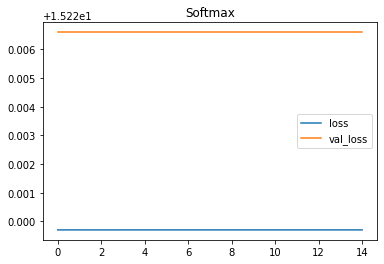

In [75]:
plt.plot(result_7.history['loss'], label = 'loss')
plt.plot(result_7.history['val_loss'], label = 'val_loss')
plt.legend()
plt.title('Softmax')

Text(0.5, 1.0, 'Softmax')

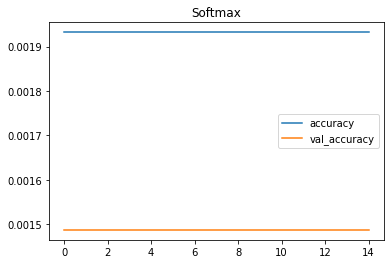

In [76]:
plt.plot(result_7.history['accuracy'], label = 'accuracy')
plt.plot(result_7.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.title('Softmax')

# Observations:
   Softmax = it is used for image classification.

   Here only softmax used 30(col)(i/p layer) - 128(inner layer) - 64(inner layer) - 32(inner layer) - 16(inner alyer) - 8(inner layer) - 1(output layer).

used = 

    loss = ["binary_crossentropy"],
    optimizer = "sgd",
    metrics = ['accuracy']
    epochs = 20, (any num as per size)
    batch_size = 88.

As u see the result is quite less
 
    loss is 15
    Accuracy = 0.001

# Overall Observations:

performed models : 

      1. Relu with Sigmoid
      2. Relu with Softmax
      3. LeakyRelu with sigmoid
      4. sigmoid with softmax
      5. Sigmoid
      6. elu.
      7. Softmax

Start with relu when we use relu with sigmoid in output layer then the result is quite good , got acc is high and loss is also less. But when relu is uesd with Softmax in output layer tehn result is not that good compared to above one here got accuracy us aslo less and loss is also less.

Leaky relu is mainly used to overcome the disadvantage of relu convcept. here teh result is also quite good.

Sigmoid is also called as logistic func as we know the range is (0,1) as we used softmax in output layer then result is not as good here is also the accuracy is less and losss is also less.

When u use Softmax in output layer or only softmax overall then also the output will be like accuracy is less & loss is high.
